In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import zipfile

%matplotlib inline

In [2]:
zipfile.ZipFile('../chapter7/names_new.zip').extractall('names')

In [3]:
ls

PASADENA.dly     chapter_5.ipynb  loading_text.py  sequences.py
__pycache__/     chapter_6.ipynb  loops.py         stations.txt
allyears.csv.gz  chapter_6.py     names/           venv/
chapter_2.ipynb  chapter_7.ipynb  random.npy
chapter_3.ipynb  dictionaries.py  random.txt
chapter_4.ipynb  getweather.py    readme.txt


In [4]:
ls ../chapter7

07_02_loading.ipynb*    07_06_solution.ipynb*   names/
07_03_popularity.ipynb* Untitled.ipynb          names.zip*
07_04_topten.ipynb*     allyears.csv.gz         names_new.zip


In [5]:
# load CSV file as DataFrame, then create a new column "year" with all elements set to 2011
pd.read_csv('names/yob2011.txt', names=['name','sex','number']).assign(year=2011)

,name,sex,number,year
0,Sophia,F,21842,2011
1,Isabella,F,19910,2011
2,Emma,F,18803,2011
3,Olivia,F,17322,2011
4,Ava,F,15503,2011
...,...,...,...,...
33903,Zylar,M,5,2011
33904,Zylas,M,5,2011
33905,Zyran,M,5,2011
33906,Zyshawn,M,5,2011


In [6]:
# for each year in 1880-2018, load the corresponding CSV file names/yobXXXX.txt
# as DataFrame, create new column "year" with all elements set to loop variable,
# then concatenate all DataFrames into a single one
allyears = pd.concat(pd.read_csv(f'names/yob{year}.txt',
                                 names=['name','sex','number']).assign(year=year)
                     for year in range(1880, 2019))

In [7]:
allyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957046 entries, 0 to 32032
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   number  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 74.7+ MB


In [8]:
allyears.year.min(), allyears.year.max()

(1880, 2018)

In [9]:
# save DataFrame to compressed CSV file, dropping uninteresting index
allyears.to_csv('allyears.csv.gz', index=False)

In [10]:
allyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957046 entries, 0 to 32032
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   number  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 74.7+ MB


In [11]:
allyears = pd.read_csv('allyears.csv.gz')

In [12]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

In [13]:
allyears_indexed.loc[('F','Mary')]

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
...,...
2014,2632
2015,2631
2016,2508


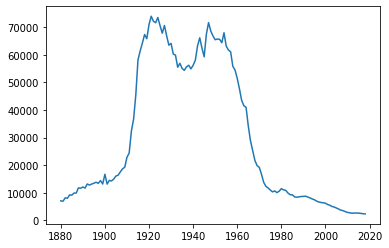

In [14]:
pp.plot(allyears_indexed.loc[('F','Mary')])

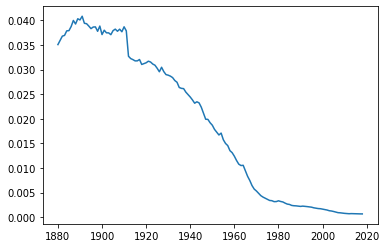

In [21]:
# normalize F/Mary time series by the total number of births each year
pp.plot(allyears_indexed.loc[('F','Mary')] / allyears.groupby('year').sum())

In [22]:
# plot number of sex/name babies as a function of year

def plotname(sex, name):
    data = allyears_indexed.loc[(sex,name)]
    
    pp.plot(data.index, data.values, label=name)
    pp.axis(xmin=1880, xmax=2018)

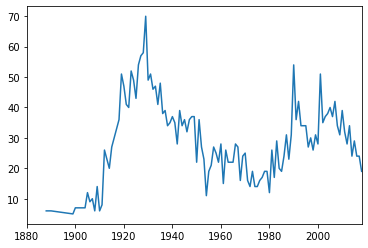

In [23]:
plotname('M', 'Johny')

In [29]:
# combine several "plotname()" plots for given sex and list of names

def comparenames(sex, names):
    pp.figure(figsize=(12,2.5))

    for name in names:
        plotname(sex, name)

    pp.legend()

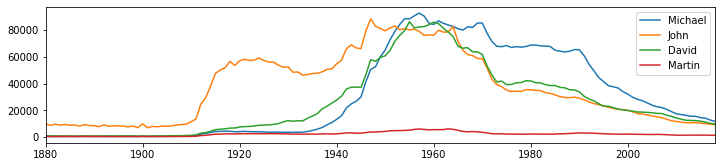

In [30]:
comparenames('M', ['Michael','John','David','Martin'])

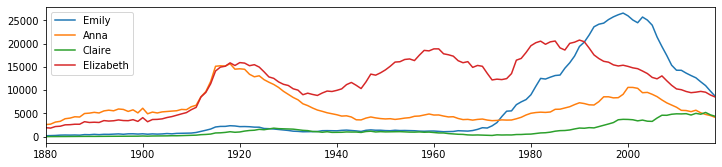

In [26]:
comparenames('F', ['Emily','Anna','Claire','Elizabeth'])

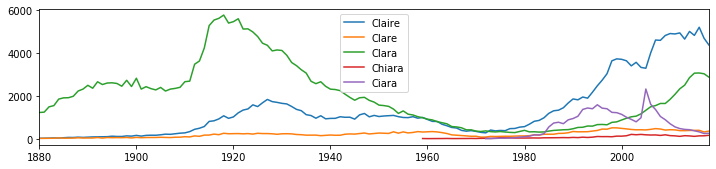

In [31]:
claires = ['Claire','Clare','Clara','Chiara','Ciara']
comparenames('F', claires)

In [32]:
# "pivot" the third level of the multiindex (years) to create a row of columns;
# result is names (rows) x years (columns)
allyears_indexed.loc[('F',claires),:].unstack(level=2)

number                                                          \
year          1880    1881    1882    1883    1884    1885    1886    1887   
sex name                                                                     
F   Chiara     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
    Ciara      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
    Claire    21.0    23.0    30.0    38.0    33.0    49.0    61.0    58.0   
    Clara   1226.0  1242.0  1490.0  1548.0  1852.0  1910.0  1916.0  1984.0   
    Clare     15.0    20.0    21.0    22.0    38.0    27.0    26.0    31.0   

                            ...                                          \
year          1888    1889  ...    2009    2010    2011    2012    2013   
sex name                    ...                                           
F   Chiara     NaN     NaN  ...   183.0   145.0   134.0   111.0   142.0   
    Ciara      NaN     NaN  ...   888.0   699.0   554.0   475.0   436.0   
    Claire    73.0    62.0  ...  4824.0  4915.0  4896.0  4944.0  4656.0   
    Clara   2230.0  2319.0  ...  1647.0  1840.0  2074.0  2333.0  2504.0   
    Clare     43.0    34.0  ...   405.0   421.0   414.0   379.0   377.0   

                                                    
year          2014    2015    2016    2017    2018  
sex name                                            
F   Chiara   131.0   111.0   134.0   137.0   160.0  
    Ciara    422.0   372.0   321.0   243.0   256.0  
    Claire  5014.0  4829.0  5209.0  4693.0  4379.0  
    Clara   2854.0  3064.0  3072.0  3035.0  2877.0  
    Clare    386.0   389.0   394.0   315.0   357.0  

[5 rows x 139 columns]

In [33]:
# "pivot" the third level of the multiindex (names) to create a row of columns
allyears_indexed.loc[('F',claires),:].unstack(level=1)

number                              
name     Chiara  Ciara  Claire   Clara  Clare
sex year                                     
F   1880    NaN    NaN    21.0  1226.0   15.0
    1881    NaN    NaN    23.0  1242.0   20.0
    1882    NaN    NaN    30.0  1490.0   21.0
    1883    NaN    NaN    38.0  1548.0   22.0
    1884    NaN    NaN    33.0  1852.0   38.0
...         ...    ...     ...     ...    ...
    2014  131.0  422.0  5014.0  2854.0  386.0
    2015  111.0  372.0  4829.0  3064.0  389.0
    2016  134.0  321.0  5209.0  3072.0  394.0
    2017  137.0  243.0  4693.0  3035.0  315.0
    2018  160.0  256.0  4379.0  2877.0  357.0

[139 rows x 5 columns]

In [34]:
allyears_byyear = allyears.set_index(['sex','year']).sort_index()

In [36]:
allyears_byyear.loc['M',2018].sort_values('number', ascending=False).head(10)

name  number
sex year                  
M   2018      Liam   19837
    2018      Noah   18267
    2018   William   14516
    2018     James   13525
    2018    Oliver   13389
    2018  Benjamin   13381
    2018    Elijah   12886
    2018     Lucas   12585
    2018     Mason   12435
    2018     Logan   12352

In [37]:
# get the top ten names for sex and year

def getyear(sex, year):
    return (allyears_byyear.loc[sex, year]             # select M/F, year
               .sort_values('number', ascending=False) # sort by most common
               .head(10)                               # only ten
               .reset_index()                          # lose the index
               .name)                                  # return a name-only Series

In [38]:
# create DataFrame with columns given by top ten name Series for range of years
pd.DataFrame({year: getyear('M',year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Jacob,Jacob,Jacob,Noah,Noah,Noah,Noah,Liam,Liam
1,Ethan,Mason,Mason,Jacob,Liam,Liam,Liam,Noah,Noah
2,Michael,William,Ethan,Liam,Mason,Mason,William,William,William
3,Jayden,Jayden,Noah,Mason,Jacob,Jacob,Mason,James,James
4,William,Noah,William,William,William,William,James,Logan,Oliver
5,Alexander,Michael,Liam,Ethan,Ethan,Ethan,Benjamin,Benjamin,Benjamin
6,Noah,Ethan,Michael,Michael,Michael,James,Jacob,Mason,Elijah
7,Daniel,Alexander,Jayden,Alexander,Alexander,Alexander,Michael,Elijah,Lucas
8,Aiden,Aiden,Alexander,Jayden,James,Michael,Elijah,Oliver,Mason
9,Anthony,Daniel,Aiden,Daniel,Daniel,Benjamin,Ethan,Jacob,Logan


In [39]:
pd.DataFrame({year: getyear('F',year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Isabella,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma
1,Sophia,Isabella,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia
2,Emma,Emma,Isabella,Olivia,Sophia,Sophia,Ava,Ava,Ava
3,Olivia,Olivia,Olivia,Isabella,Isabella,Ava,Sophia,Isabella,Isabella
4,Ava,Ava,Ava,Ava,Ava,Isabella,Isabella,Sophia,Sophia
5,Emily,Emily,Emily,Mia,Mia,Mia,Mia,Mia,Charlotte
6,Abigail,Abigail,Abigail,Emily,Emily,Abigail,Charlotte,Charlotte,Mia
7,Madison,Madison,Mia,Abigail,Abigail,Emily,Abigail,Amelia,Amelia
8,Chloe,Mia,Madison,Madison,Madison,Charlotte,Emily,Evelyn,Harper
9,Mia,Chloe,Elizabeth,Elizabeth,Charlotte,Harper,Harper,Abigail,Evelyn


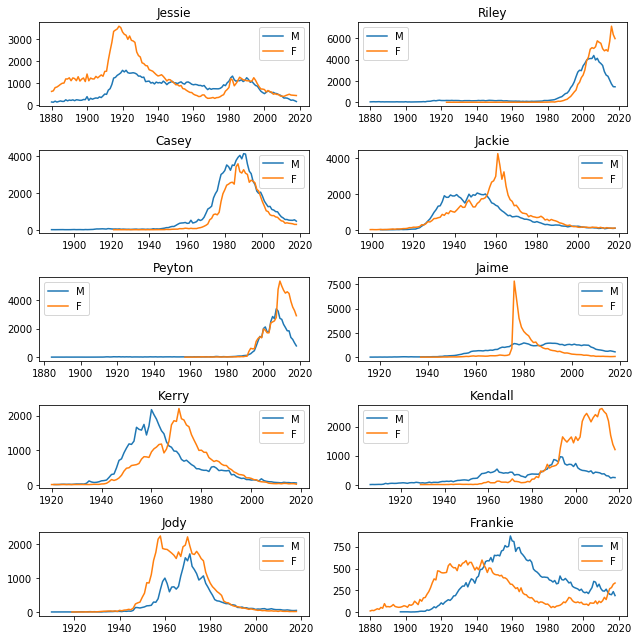

In [41]:
# total number across all years, grouped by sex and name
totals = allyears.groupby(['sex','name']).number.sum()

# split into male and female totals
male, female = totals.loc['M'], totals.loc['F']

# compute ratio of male and female totals (Pandas aligns axes automatically);
# drop NaNs that occur where only one Series has a value
ratios = (totals.loc['M'] / totals.loc['F']).dropna()

# names that fit the unisex ratio constraint
unisex = ratios[(ratios > 0.5) & (ratios < 2)].index

# sorted and capped M + F totals for unisex names;
# results in array of top ten unisex counts, indexed by name
common = (male.loc[unisex] + female.loc[unisex]).sort_values(ascending=False).head(10)

allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

pp.figure(figsize=(9,9))

# loop over top-ten unisex names
for i, name in enumerate(common.index):
    pp.subplot(5,2,i+1)

    pp.plot(allyears_indexed.loc['M',name], label='M')
    pp.plot(allyears_indexed.loc['F',name], label='F')
    
    pp.legend()
    pp.title(name)

# improve subplot spacing
pp.tight_layout()